# Physics 300 
## Computational Physics I (Fall 2017)
## BPB-248, Tues/Thurs 10:00 - 11:15 am 

|Instructor| Prof. Qiang Zhu|
|--|-------------------------------|
|Email | qiang.zhu@unlv.edu|
|Website|http://www.physics.unlv.edu/~qzhu/|
|Office| BPB 232|
|Office hours | Tues/Thurs 8:30 - 10:00 |

# 7 Interpolation
Interpolation is another technique which has been extensively used by physicists. It is not directly related to integrals and derivatives, but uses similar math- ematical methods.

Suppose you are given the value of a function $f(x)$ at just two points $x = a, b$ and you want to know the value of the function at another point $x$ in between. What do you do? 


There are a number of possibilities.

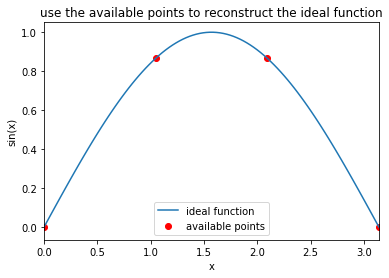

In [9]:
# Let's start with a simple example
import matplotlib.pyplot as plt
import numpy as np
from math import pi

f = lambda x: np.sin(x) 
x_min, x_max = 0, pi
npt0 = 100
npt1 = 4

x0 = np.linspace(x_min, x_max, npt0)
x1 = np.linspace(x_min, x_max, npt1) 

plt.plot(x0,f(x0),label='ideal function')
plt.scatter(x1,f(x1), color='r', label='available points')

plt.legend()
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.xlim([0,pi])
plt.title('use the available points to reconstruct the ideal function')
plt.show()

## 7.1 Linear interpolation
The simplest is linear interpolation. We assume our function follows a straight line from f(a) to f(b), which in most cases is an approximation—likely the function follows a curve between the two points, as sketched in the figure. But if we make this assumption then we can calculate $f(x)$ with some elementary geometry.

The slope of the straight-line approximation is

$$m = \frac{f(b)-f(a)}{b-a}$$

This is exactly what we did on integration with trazoidal rule.


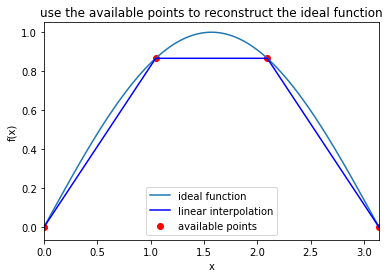

In [60]:
# Let's start with a simple example
import matplotlib.pyplot as plt
import numpy as np
from math import pi

f = lambda x: np.sin(x) 
x_min, x_max = 0, pi
npt0 = 100 #ideal function
npt1 = 4   #available points
npt2 = 10  #number of points you want to interpolate bewteen two known points

x0 = np.linspace(x_min, x_max, npt0) #ideal function
x1 = np.linspace(x_min, x_max, npt1) #available points


#---------To interpolate based on the available points

x2 = []
y2 = []

for i in range(npt1-1):
    slope = (f(x1[i+1])-f(x1[i]))/(x1[i+1]-x1[i])
    delta = (x1[i+1]-x1[i])/npt2
    for j in range(npt2+1):
        x2.append(x1[i]+delta*j)
        y2.append(f(x1[i]) + slope*delta*j)
#---------To interpolate based on the available points



#plot all points
plt.plot(x0,f(x0),label='ideal function')
plt.scatter(x1,f(x1), color='r', label='available points')
plt.plot(x2,y2, 'b', label='linear interpolation')

plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim([0,pi])
plt.title('use the available points to reconstruct the ideal function')
plt.show()

## 7.2 Spline interpolation

You might immediately realize that linear interpolation might not be a good approximation when the ideal function is far from being linear. Thus it might introduce notable errors in some cases. Similar to what we did on integral, a better approximation is to use polynomial functions. __Spline interpolation__ is a form of interpolation where the interpolant is a special type of piecewise polynomial called a spline. 

__Linear interpolation__, in this context, is actually the simplest version of spline interpolation.
$$S_i(x) = y_i + \frac{y_{i+1}-y_i}{x_{i+1}-xi}(x-x_i) $$

If we do __quardratic spline interpolation__, the relation is a bit tricky. Let's start with a simple example.

Assume we have three points

(-1,0), (0,1), (1,3)

We want to find the quadratic spline is 

$$ p_1(x) = a_1 + b_1x + c_1x^2 ~~~[-1,0]$$
$$ p_2(x) = a_2 + b_2x + c_2x^2 ~~~[0,1] $$

They should satisfy the following conditions
$$p_1(-1)=a_1-b_1+c_1 = 0$$
$$p_1(0) = a_1 = 1 $$
$$p_2(0) = a_2 = 1 $$
$$p_2(1) = a_2 + b_2 + c_2 = 3 $$

In addition, we want to curves to be continous, therefore $p_1(0)' = p_2(0)'$ gives
$$b_1 = b_2$$

There are 6 variables in total, but we only have five equations, so one must define another condition.
Usually, we can impose the constrain about the derivative of the ending members, say let $p_1(-1)'$=0,
$$b_1 - 2c_1 = 0$$

Therefore, we can solve the equations, and get all coefficients for the quadratic spline function

$$ p_1(x) = 1 + 2x + x^2 ~~~[-1,0]$$
$$ p_2(x) = 1 + 2x  ~~~~~~~~[0,1] $$

If we do interpolation for a series of points, the generallized relation is the following,
$$S_i(x) = y_i + z_i(x-x_i) + \frac{z_{i+1}-z_i}{2(x_{i+1}-x_i)}(x-x_i)^2$$
where $z$ series could be obtained via
$$z_{i+1} = -z_i + 2\frac{y_{i+1}-y_i}{x_{i+1}-x_i}$$

and $z_0$ is the derivative of the 1st point.

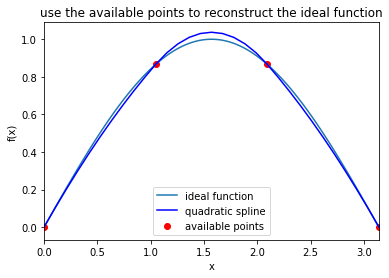

In [58]:
# Let's start with a simple example
import matplotlib.pyplot as plt
import numpy as np
from math import pi

f = lambda x: np.sin(x) 
x_min, x_max = 0, pi
npt0 = 100 #ideal function
npt1 = 4   #available points
npt2 = 10  #number of points you want to interpolate bewteen two known points

x0 = np.linspace(x_min, x_max, npt0) #ideal function
x1 = np.linspace(x_min, x_max, npt1) #available points


#---------To interpolate based on the available points
x2 = []
y2 = []
z = np.empty(npt1)
z[0] = 1    # try to play with different values here

for i in range(npt1-1):
    slope = (f(x1[i+1])-f(x1[i]))/(x1[i+1]-x1[i])
    delta = (x1[i+1]-x1[i])/npt2
    z[i+1] = -z[i] + 2*slope


    for j in range(npt2+1):
        x2.append(x1[i]+delta*j)
        y2.append(f(x1[i]) + z[i]*delta*j + (z[i+1]-z[i])*delta*j*j/2/npt2)
        #print(x2[-1],y2[-1])    
#---------To interpolate based on the available points


#plot all points
plt.plot(x0,f(x0),label='ideal function')
plt.scatter(x1,f(x1), color='r', label='available points')
plt.plot(x2,y2, 'b', label='quadratic spline')


plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim([0,pi])
plt.title('use the available points to reconstruct the ideal function')
plt.show()

Similarly, we can also do high order polynomial. For instance, __cubic spline__ is the most popular methods used in many fields. The logic is nothing else, but the extension of polynoimal function and the conditions. 

$$S_i(x) = \frac{z_{i+1}(x-x_i)^3 + z_i(x_{i+1}-x)^3} {6h_i} + (\frac{y_{i+1}}{h_i}-\frac{h_i}{6}z_{i+1}) + (\frac{y_i}{h_i}-\frac{h_i}{6}z_i) (x_{i+1}-x_i)$$

where $h_i = x_{i+1} - x_i $, and $z$ series could be obtained via
$$h_{i-1}z_{i-1} + 2(h_{i-1}+h_i)z_i + h_iz_{i+1} =6(\frac{y_{i+1}}{h_i}-\frac{y_i-y_{i-1}}{h_{i-1}}) $$

## 7.3 Advanced Library in Scipy

You might think it is easier to understand the code than writing is from the scracth. Indeed, cubic spline already becomes something very handy to implement. A good news is that there are a lot of work devoted to building those fundamental libraries for scientific programing. The most important one in python is scipy.

https://scipy.org/

You will find you could immediately get away from those low level works after using scipy.

But one at least needs to know the principle of these functions. It is very risky that one use some function without knowing anything about it.



In [62]:
#example of integration in scipy
import numpy as np
from scipy import integrate

f = lambda x: 3*x**3 + 1
x_min, x_max = 0, 1
I, err = integrate.quad(f,x_min,x_max)
print(I, err)

1.75 1.942890293094024e-14


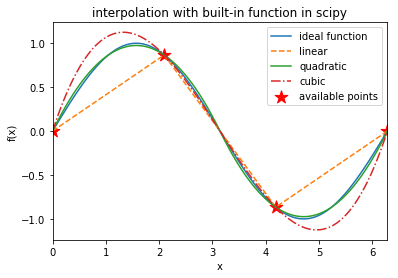

In [18]:
#example of interpolation in scipy
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from scipy.interpolate import *

f = lambda x: np.sin(x) 
x_min, x_max = 0, 2*pi
npt0 = 100 #ideal function
npt1 = 4   #available points
npt2 = 10  #number of points you want to interpolate bewteen two known points

x0 = np.linspace(x_min, x_max, npt0) #ideal function
x1 = np.linspace(x_min, x_max, npt1) #available points

f_spline1 = interpolate.interp1d(x1, f(x1), kind='linear')
f_spline2 = interpolate.interp1d(x1, f(x1), kind='quadratic')
f_spline3 = interpolate.interp1d(x1, f(x1), kind='cubic')


#plot all points
plt.plot(x0,f(x0),label='ideal function')
plt.plot(x0,f_spline1(x0), '--',  label='linear')
plt.plot(x0,f_spline2(x0), '-', label='quadratic')
plt.plot(x0,f_spline3(x0), '-.', label='cubic')
plt.scatter(x1,f(x1), c='r', s=180, marker='*', label='available points')


plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim([x_min, x_max])
plt.title('interpolation with built-in function in scipy')
plt.show()


## 7.4 Discussion

For a curve to be continuous, we have to make sure each segment gives the equal value when they meet

$f_i(x_i) = f_{i+1}(x_i)$

This is what linear spline does.

In order to make the curve smooth, we also ask that the 1st derivatives to be equal

$(f_i(x_i))' = (f_{i+1}(x_i))'$

which has been used in quadratic spline interpolation.

For the segments to have the same curvature when they meet, we impose

$(f_i(x_i))'' = (f_{i+1}(x_i))''$

One has to go to cubic spline in order to satisfy this condition. That's why cubic spline is the most popular choice when people do interpolation. The high order equations gives even smoother curves, but it is more expensive and the changes will become more subtle.

